In this notebook, we generate the acid dataset from the individual descriptors of the acids and bromides. Please note that the two bromide datasets were directly generated in the descriptor calculation notebook as these are pseudo-mono-substrate reactions (since the acid is constant in that case).

In [2]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..','..','..','..','..')))
from Code import ScopeBO
import pandas as pd
import numpy as np
import seaborn as sns
from rdkit import Chem
import matplotlib.pyplot as plt
import matplotlib as mpl
import umap
from sklearn.preprocessing import scale
import random

Import the descriptors for both substrate classes and generate the fully combinatorial scope

In [6]:
df_combinatorial = ScopeBO.create_reaction_space(reactants={"Data_For_Individual_Substrates/xec_dft_descr_bromides.csv":"bromide", 
                                                            "Data_For_Individual_Substrates/xec_dft_descr_acids.csv":"acid"}, feature_processing=False,
                                                            filename="xec_fully_combinatorial_reaction_space.csv", suggest_samples=False,)
df_combinatorial

Generation of reaction space completed!
The search space has been saved in the file 'xec_fully_combinatorial_reaction_space.csv.'


,bromide_E,bromide_ES_root_dipole,bromide_ES_root_electronic_spatial_extent,bromide_ES_root_molar_volume,bromide_E_scf,bromide_E_thermal_correction,bromide_E_zpe,bromide_G,bromide_G_thermal_correction,bromide_H,...,acid_O2_ES_root_NPA_valence,acid_O2_Mulliken_charge,acid_O2_NMR_anisotropy,acid_O2_NMR_shift,acid_O2_NPA_Rydberg,acid_O2_NPA_charge,acid_O2_NPA_core,acid_O2_NPA_total,acid_O2_NPA_valence,acid_O2_VBur
CCOC(=O)c1ncn2c1CN(C)C(=O)c1cc(Br)ccc1-2.CC1(C)C(C(=O)O)C1(C)C,-3542.222451,7.456172,11392.143394,2262.849124,-3542.511141,0.297904,-3542.242007,-3542.292264,0.228092,-3542.221507,...,6.643110,-0.198920,200.992700,135.381500,0.009930,-0.701190,1.999700,8.701190,6.691570,0.355648
CCOC(=O)c1ncn2c1CN(C)C(=O)c1cc(Br)ccc1-2.COc1ccc(CC(=O)O)cc1,-3542.222451,7.456172,11392.143394,2262.849124,-3542.511141,0.297904,-3542.242007,-3542.292264,0.228092,-3542.221507,...,6.694966,-0.202234,177.250002,145.792822,0.010411,-0.705854,1.999683,8.705854,6.695760,0.375991
CCOC(=O)c1ncn2c1CN(C)C(=O)c1cc(Br)ccc1-2.O=C(O)C1CCC(F)(F)CC1,-3542.222451,7.456172,11392.143394,2262.849124,-3542.511141,0.297904,-3542.242007,-3542.292264,0.228092,-3542.221507,...,6.658938,-0.202033,178.153197,150.492035,0.010197,-0.711129,1.999680,8.711129,6.701250,0.398661
CCOC(=O)c1ncn2c1CN(C)C(=O)c1cc(Br)ccc1-2.O=C(O)Cc1ccc(C(F)(F)F)cc1,-3542.222451,7.456172,11392.143394,2262.849124,-3542.511141,0.297904,-3542.242007,-3542.292264,0.228092,-3542.221507,...,6.691862,-0.197326,180.765052,146.055224,0.010200,-0.703580,1.999690,8.703580,6.693695,0.355745
CCOC(=O)c1ncn2c1CN(C)C(=O)c1cc(Br)ccc1-2.C#CCCCCCCC(=O)O,-3542.222451,7.456172,11392.143394,2262.849124,-3542.511141,0.297904,-3542.242007,-3542.292264,0.228092,-3542.221507,...,6.654414,-0.202855,189.077454,146.270783,0.010221,-0.708130,1.999684,8.708130,6.698221,0.370462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
COC(=O)CC1CCc2cc(Br)cc3[nH]c(=O)c(=O)n1c23.O=C1CC(C(=O)O)CCN1,-3524.070081,6.885499,6901.164734,2329.619286,-3524.339370,0.279476,-3524.088138,-3524.135520,0.214037,-3524.069137,...,6.713283,-0.196779,179.382001,149.054064,0.010234,-0.706725,1.999680,8.706725,6.696811,0.393586
COC(=O)CC1CCc2cc(Br)cc3[nH]c(=O)c(=O)n1c23.O=C1CCC(C(=O)O)CC1,-3524.070081,6.885499,6901.164734,2329.619286,-3524.339370,0.279476,-3524.088138,-3524.135520,0.214037,-3524.069137,...,6.698578,-0.197578,180.944804,148.750766,0.010198,-0.708076,1.999680,8.708076,6.698206,0.407740
COC(=O)CC1CCc2cc(Br)cc3[nH]c(=O)c(=O)n1c23.O=C1CCC(C(=O)O)Cc2ccccc21,-3524.070081,6.885499,6901.164734,2329.619286,-3524.339370,0.279476,-3524.088138,-3524.135520,0.214037,-3524.069137,...,6.700120,-0.195811,172.939736,149.642760,0.010072,-0.707039,1.999680,8.707039,6.697287,0.400356
COC(=O)CC1CCc2cc(Br)cc3[nH]c(=O)c(=O)n1c23.O=C1O[C@]2(CC[C@H](C(=O)O)CC2)c2cnccc21,-3524.070081,6.885499,6901.164734,2329.619286,-3524.339370,0.279476,-3524.088138,-3524.135520,0.214037,-3524.069137,...,6.698105,-0.199537,175.349453,150.225523,0.010237,-0.707902,1.999681,8.707902,6.697984,0.395898


Load the filtered experimental dataset to reduce the generated substrate combinations to the ones that are actually in the experimental dataset

In [9]:
data = pd.read_csv("./../../xec_raw_dset_acid_scope.csv",index_col=0, header=0)
print(f"The (filtered) experimental dataset has {len(data)} experiments.")
data

The (filtered) experimental dataset has 885 experiments.


,Prod_Smiles,ArX_Smiles,Acid_Smiles,CAD Yield
Reaction #,,,,
385,COC(=O)CC1CCc2cc(C3CC3)cc3[nH]c(=O)c(=O)n1c23,COC(=O)CC1CCc2cc(Br)cc3[nH]c(=O)c(=O)n1c23,O=C(O)C1CC1,10.0
386,COC(=O)CC1CCc2cc(C3(c4ccc(Cl)cc4)CC3)cc3[nH]c(...,COC(=O)CC1CCc2cc(Br)cc3[nH]c(=O)c(=O)n1c23,O=C(O)C1(c2ccc(Cl)cc2)CC1,1.4
388,COC(=O)CC1CCc2cc(C[C@@H]3C[C@H](C(C)=O)C3(C)C)...,COC(=O)CC1CCc2cc(Br)cc3[nH]c(=O)c(=O)n1c23,CC(=O)[C@H]1C[C@@H](CC(=O)O)C1(C)C,0.0
389,COC(=O)CC1CCc2cc(C3CCCC3)cc3[nH]c(=O)c(=O)n1c23,COC(=O)CC1CCc2cc(Br)cc3[nH]c(=O)c(=O)n1c23,O=C(O)C1CCCC1,17.5
390,COC(=O)CC1CCc2cc(C3CCCCC3)cc3[nH]c(=O)c(=O)n1c23,COC(=O)CC1CCc2cc(Br)cc3[nH]c(=O)c(=O)n1c23,O=C(O)C1CCCCC1,42.9
...,...,...,...,...
2298,CN1C(=O)C[C@@](C)(c2cc(Cc3ccc(-n4nccn4)cc3)cs2...,CN1C(=O)C[C@@](C)(c2cc(Br)cs2)N/C1=N/C(=O)OC(C...,O=C(O)Cc1ccc(-n2nccn2)cc1,4.5
2299,CN1C(=O)C[C@@](C)(c2cc(C3CN(C(=O)OC(C)(C)C)CC3...,CN1C(=O)C[C@@](C)(c2cc(Br)cs2)N/C1=N/C(=O)OC(C...,CC(C)(C)OC(=O)N1CC(C(=O)O)C(C)(C)C1,7.9
2300,CN1C(=O)C[C@@](C)(c2cc(Cc3ccc4cnn(C)c4c3)cs2)N...,CN1C(=O)C[C@@](C)(c2cc(Br)cs2)N/C1=N/C(=O)OC(C...,Cn1ncc2ccc(CC(=O)O)cc21,11.0


In [13]:
# Canonicalize the smiles
columns = ["Acid_Smiles","ArX_Smiles","Prod_Smiles"]
for column in columns:
    for idx in data.index:
        data.loc[idx,column] = Chem.MolToSmiles(Chem.MolFromSmiles(data.loc[idx,column]))
# add a column for the substrate combinations
for idx in data.index:
    br_smiles = data.loc[idx,"ArX_Smiles"]
    acid_smiles = data.loc[idx,"Acid_Smiles"]
    data.loc[idx,"Combination_Smiles"] = f"{br_smiles}.{acid_smiles}"
data.set_index(keys="Combination_Smiles",inplace=True)
data

,Prod_Smiles,ArX_Smiles,Acid_Smiles,CAD Yield
Combination_Smiles,,,,
COC(=O)CC1CCc2cc(Br)cc3[nH]c(=O)c(=O)n1c23.O=C(O)C1CC1,COC(=O)CC1CCc2cc(C3CC3)cc3[nH]c(=O)c(=O)n1c23,COC(=O)CC1CCc2cc(Br)cc3[nH]c(=O)c(=O)n1c23,O=C(O)C1CC1,10.0
COC(=O)CC1CCc2cc(Br)cc3[nH]c(=O)c(=O)n1c23.O=C(O)C1(c2ccc(Cl)cc2)CC1,COC(=O)CC1CCc2cc(C3(c4ccc(Cl)cc4)CC3)cc3[nH]c(...,COC(=O)CC1CCc2cc(Br)cc3[nH]c(=O)c(=O)n1c23,O=C(O)C1(c2ccc(Cl)cc2)CC1,1.4
COC(=O)CC1CCc2cc(Br)cc3[nH]c(=O)c(=O)n1c23.CC(=O)[C@H]1C[C@@H](CC(=O)O)C1(C)C,COC(=O)CC1CCc2cc(C[C@@H]3C[C@H](C(C)=O)C3(C)C)...,COC(=O)CC1CCc2cc(Br)cc3[nH]c(=O)c(=O)n1c23,CC(=O)[C@H]1C[C@@H](CC(=O)O)C1(C)C,0.0
COC(=O)CC1CCc2cc(Br)cc3[nH]c(=O)c(=O)n1c23.O=C(O)C1CCCC1,COC(=O)CC1CCc2cc(C3CCCC3)cc3[nH]c(=O)c(=O)n1c23,COC(=O)CC1CCc2cc(Br)cc3[nH]c(=O)c(=O)n1c23,O=C(O)C1CCCC1,17.5
COC(=O)CC1CCc2cc(Br)cc3[nH]c(=O)c(=O)n1c23.O=C(O)C1CCCCC1,COC(=O)CC1CCc2cc(C3CCCCC3)cc3[nH]c(=O)c(=O)n1c23,COC(=O)CC1CCc2cc(Br)cc3[nH]c(=O)c(=O)n1c23,O=C(O)C1CCCCC1,42.9
...,...,...,...,...
CN1C(=O)C[C@@](C)(c2cc(Br)cs2)N/C1=N/C(=O)OC(C)(C)C.O=C(O)Cc1ccc(-n2nccn2)cc1,CN1C(=O)C[C@@](C)(c2cc(Cc3ccc(-n4nccn4)cc3)cs2...,CN1C(=O)C[C@@](C)(c2cc(Br)cs2)N/C1=N/C(=O)OC(C...,O=C(O)Cc1ccc(-n2nccn2)cc1,4.5
CN1C(=O)C[C@@](C)(c2cc(Br)cs2)N/C1=N/C(=O)OC(C)(C)C.CC(C)(C)OC(=O)N1CC(C(=O)O)C(C)(C)C1,CN1C(=O)C[C@@](C)(c2cc(C3CN(C(=O)OC(C)(C)C)CC3...,CN1C(=O)C[C@@](C)(c2cc(Br)cs2)N/C1=N/C(=O)OC(C...,CC(C)(C)OC(=O)N1CC(C(=O)O)C(C)(C)C1,7.9
CN1C(=O)C[C@@](C)(c2cc(Br)cs2)N/C1=N/C(=O)OC(C)(C)C.Cn1ncc2ccc(CC(=O)O)cc21,CN1C(=O)C[C@@](C)(c2cc(Cc3ccc4cnn(C)c4c3)cs2)N...,CN1C(=O)C[C@@](C)(c2cc(Br)cs2)N/C1=N/C(=O)OC(C...,Cn1ncc2ccc(CC(=O)O)cc21,11.0


In [14]:
# Filter the combinatorial reaction space to the experimentally evaluated reactions
df_filtered = df_combinatorial.loc[df_combinatorial.index.isin(data.index.to_list())]
df_filtered

,bromide_E,bromide_ES_root_dipole,bromide_ES_root_electronic_spatial_extent,bromide_ES_root_molar_volume,bromide_E_scf,bromide_E_thermal_correction,bromide_E_zpe,bromide_G,bromide_G_thermal_correction,bromide_H,...,acid_O2_ES_root_NPA_valence,acid_O2_Mulliken_charge,acid_O2_NMR_anisotropy,acid_O2_NMR_shift,acid_O2_NPA_Rydberg,acid_O2_NPA_charge,acid_O2_NPA_core,acid_O2_NPA_total,acid_O2_NPA_valence,acid_O2_VBur
CCOC(=O)c1ncn2c1CN(C)C(=O)c1cc(Br)ccc1-2.CC1(C)C(C(=O)O)C1(C)C,-3542.222451,7.456172,11392.143394,2262.849124,-3542.511141,0.297904,-3542.242007,-3542.292264,0.228092,-3542.221507,...,6.643110,-0.198920,200.992700,135.381500,0.009930,-0.701190,1.999700,8.701190,6.691570,0.355648
CCOC(=O)c1ncn2c1CN(C)C(=O)c1cc(Br)ccc1-2.COc1ccc(CC(=O)O)cc1,-3542.222451,7.456172,11392.143394,2262.849124,-3542.511141,0.297904,-3542.242007,-3542.292264,0.228092,-3542.221507,...,6.694966,-0.202234,177.250002,145.792822,0.010411,-0.705854,1.999683,8.705854,6.695760,0.375991
CCOC(=O)c1ncn2c1CN(C)C(=O)c1cc(Br)ccc1-2.O=C(O)C1CCC(F)(F)CC1,-3542.222451,7.456172,11392.143394,2262.849124,-3542.511141,0.297904,-3542.242007,-3542.292264,0.228092,-3542.221507,...,6.658938,-0.202033,178.153197,150.492035,0.010197,-0.711129,1.999680,8.711129,6.701250,0.398661
CCOC(=O)c1ncn2c1CN(C)C(=O)c1cc(Br)ccc1-2.O=C(O)Cc1ccc(C(F)(F)F)cc1,-3542.222451,7.456172,11392.143394,2262.849124,-3542.511141,0.297904,-3542.242007,-3542.292264,0.228092,-3542.221507,...,6.691862,-0.197326,180.765052,146.055224,0.010200,-0.703580,1.999690,8.703580,6.693695,0.355745
CCOC(=O)c1ncn2c1CN(C)C(=O)c1cc(Br)ccc1-2.C#CCCCCCCC(=O)O,-3542.222451,7.456172,11392.143394,2262.849124,-3542.511141,0.297904,-3542.242007,-3542.292264,0.228092,-3542.221507,...,6.654414,-0.202855,189.077454,146.270783,0.010221,-0.708130,1.999684,8.708130,6.698221,0.370462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
COC(=O)CC1CCc2cc(Br)cc3[nH]c(=O)c(=O)n1c23.O=C1CC(C(=O)O)CCN1,-3524.070081,6.885499,6901.164734,2329.619286,-3524.339370,0.279476,-3524.088138,-3524.135520,0.214037,-3524.069137,...,6.713283,-0.196779,179.382001,149.054064,0.010234,-0.706725,1.999680,8.706725,6.696811,0.393586
COC(=O)CC1CCc2cc(Br)cc3[nH]c(=O)c(=O)n1c23.O=C1CCC(C(=O)O)CC1,-3524.070081,6.885499,6901.164734,2329.619286,-3524.339370,0.279476,-3524.088138,-3524.135520,0.214037,-3524.069137,...,6.698578,-0.197578,180.944804,148.750766,0.010198,-0.708076,1.999680,8.708076,6.698206,0.407740
COC(=O)CC1CCc2cc(Br)cc3[nH]c(=O)c(=O)n1c23.O=C1CCC(C(=O)O)Cc2ccccc21,-3524.070081,6.885499,6901.164734,2329.619286,-3524.339370,0.279476,-3524.088138,-3524.135520,0.214037,-3524.069137,...,6.700120,-0.195811,172.939736,149.642760,0.010072,-0.707039,1.999680,8.707039,6.697287,0.400356
COC(=O)CC1CCc2cc(Br)cc3[nH]c(=O)c(=O)n1c23.O=C1O[C@]2(CC[C@H](C(=O)O)CC2)c2cnccc21,-3524.070081,6.885499,6901.164734,2329.619286,-3524.339370,0.279476,-3524.088138,-3524.135520,0.214037,-3524.069137,...,6.698105,-0.199537,175.349453,150.225523,0.010237,-0.707902,1.999681,8.707902,6.697984,0.395898


In [21]:
# Check the distribution of descriptors in the dataset before preprocessing
acid_features = [feature for feature in df_filtered.columns if "acid" in feature]
bromide_features = [feature for feature in df_filtered.columns if "bromide" in feature]
print(f"There are {len(acid_features)} acid features and {len(bromide_features)} bromide featues in the unprocessed dataset.")

There are 85 acid features and 54 bromide featues in the unprocessed dataset.


In [16]:
# create_reaction_space needs a csv as input - needs to be generated
df_filtered.to_csv("xec_unprocessed_descr_dft_subs.csv",index=True,header=True)
# run the function; this time with the flag feature_processing=True
df_processed = ScopeBO().create_reaction_space(reactants=["xec_unprocessed_descr_dft_subs.csv"],
                                               feature_processing=True, suggest_samples=False,
                                               filename="xec_processed_descr_dft_subs.csv")
df_processed = df_processed.sort_index() # sort to ensure consistent ordering between the different datasets
# assign the yields
df_processed["yield"] = df_processed.index.map(data["CAD Yield"])
df_processed.to_csv("./../xec_dft_data_acid_scope.csv",index=True,header=True)
df_processed

Now doing feature preprocessing.
The following features were removed: ['bromide_charge', 'bromide_ES_root_molar_volume', 'bromide_E_scf', 'bromide_E_thermal_correction', 'bromide_E_zpe', 'bromide_G', 'bromide_G_thermal_correction', 'bromide_H', 'bromide_H_thermal_correction', 'bromide_electronic_spatial_extent', 'bromide_hardness', 'bromide_homo_energy', 'bromide_lumo_energy', 'bromide_molar_mass', 'bromide_molar_volume', 'bromide_number_of_atoms', 'bromide_zero_point_correction', 'bromide_C1_APT_charge', 'bromide_C1_ES_root_Mulliken_charge', 'bromide_C1_ES_root_NPA_Rydberg', 'bromide_C1_ES_root_NPA_charge', 'bromide_C1_ES_root_NPA_core', 'bromide_C1_ES_root_NPA_total', 'bromide_C1_ES_root_NPA_valence', 'bromide_C1_Mulliken_charge', 'bromide_C1_NMR_anisotropy', 'bromide_C1_NMR_shift', 'bromide_C1_NPA_Rydberg', 'bromide_C1_NPA_charge', 'bromide_C1_NPA_core', 'bromide_C1_NPA_total', 'bromide_C1_NPA_valence', 'bromide_C1_VBur', 'bromide_Br1_APT_charge', 'bromide_Br1_ES_root_Mulliken_charg

,bromide_E,bromide_ES_root_dipole,bromide_ES_root_electronic_spatial_extent,bromide_dipole,bromide_electronegativity,acid_E,acid_ES_root_dipole,acid_ES_root_electronic_spatial_extent,acid_ES_root_molar_volume,acid_E_thermal_correction,...,acid_O2_ES_root_NPA_charge,acid_O2_ES_root_NPA_core,acid_O2_Mulliken_charge,acid_O2_NMR_anisotropy,acid_O2_NMR_shift,acid_O2_NPA_Rydberg,acid_O2_NPA_charge,acid_O2_NPA_core,acid_O2_VBur,yield
CCOC(=O)c1ncn2c1CN(C)C(=O)c1cc(Br)ccc1-2.C#CCCCCCCC(=O)O,-3542.222451,7.456172,11392.143394,2.382913,0.160042,-500.798988,0.761858,2861.420521,1536.287003,0.228128,...,-0.664830,1.999712,-0.202855,189.077454,146.270783,0.010221,-0.708130,1.999684,0.370462,16.4
CCOC(=O)c1ncn2c1CN(C)C(=O)c1cc(Br)ccc1-2.C=CC[C@H](CC(=O)O)NC(=O)OC(C)(C)C,-3542.222451,7.456172,11392.143394,2.382913,0.160042,-784.799817,2.130126,4720.991198,2052.312816,0.316699,...,-0.678531,1.999710,-0.202661,183.927435,145.370577,0.010238,-0.709632,1.999683,0.389075,18.9
CCOC(=O)c1ncn2c1CN(C)C(=O)c1cc(Br)ccc1-2.CC(=O)CCc1ccc(OCC(=O)O)cc1,-3542.222451,7.456172,11392.143394,2.382913,0.160042,-765.192335,3.088311,5928.587571,1760.033959,0.258455,...,-0.702729,1.999682,-0.197307,171.037286,153.251878,0.010756,-0.703077,1.999682,0.383384,75.1
CCOC(=O)c1ncn2c1CN(C)C(=O)c1cc(Br)ccc1-2.CC(=O)N1CCCC1C(=O)O,-3542.222451,7.456172,11392.143394,2.382913,0.160042,-552.804534,3.887531,1624.918016,1370.424691,0.194038,...,-0.713488,1.999683,-0.195455,170.489169,150.445517,0.010388,-0.705028,1.999674,0.426075,68.8
CCOC(=O)c1ncn2c1CN(C)C(=O)c1cc(Br)ccc1-2.CC(=O)N1C[C@H](O)C[C@H]1C(=O)O,-3542.222451,7.456172,11392.143394,2.382913,0.160042,-627.901674,3.198489,1988.318110,1472.926316,0.199515,...,-0.711372,1.999680,-0.192859,169.608364,150.192885,0.010404,-0.702419,1.999674,0.419683,34.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
COC(=O)CC1CCc2cc(Br)cc3[nH]c(=O)c(=O)n1c23.O=C1CC(C(=O)O)CCN1,-3524.070081,6.885499,6901.164734,6.114184,0.143957,-513.585362,2.865819,1418.964656,1130.577386,0.165295,...,-0.723511,1.999680,-0.196779,179.382001,149.054064,0.010234,-0.706725,1.999680,0.393586,16.3
COC(=O)CC1CCc2cc(Br)cc3[nH]c(=O)c(=O)n1c23.O=C1CCC(C(=O)O)CC1,-3524.070081,6.885499,6901.164734,6.114184,0.143957,-497.539858,2.594684,1458.411943,1235.468180,0.175948,...,-0.708465,1.999680,-0.197578,180.944804,148.750766,0.010198,-0.708076,1.999680,0.407740,47.8
COC(=O)CC1CCc2cc(Br)cc3[nH]c(=O)c(=O)n1c23.O=C1CCC(C(=O)O)Cc2ccccc21,-3524.070081,6.885499,6901.164734,6.114184,0.143957,-688.932575,3.299982,2966.877481,1791.833361,0.232772,...,-0.709862,1.999680,-0.195811,172.939736,149.642760,0.010072,-0.707039,1.999680,0.400356,39.1
COC(=O)CC1CCc2cc(Br)cc3[nH]c(=O)c(=O)n1c23.O=C1O[C@]2(CC[C@H](C(=O)O)CC2)c2cnccc21,-3524.070081,6.885499,6901.164734,6.114184,0.143957,-857.347135,4.924800,4876.792149,1856.916379,0.263725,...,-0.708027,1.999681,-0.199537,175.349453,150.225523,0.010237,-0.707902,1.999681,0.395898,31.9


Check how many features below to the acid and how many to the bromide

In [17]:
acid_features = [feature for feature in df_processed.columns if "acid" in feature]
bromide_features = [feature for feature in df_processed.columns if "bromide" in feature]
print(f"There are {len(acid_features)} acid features and {len(bromide_features)} bromide features in the dataset.")

There are 53 acid features and 5 bromide features in the dataset.


Let's visualize the data distribution on a UMAP

Distribution of yields:


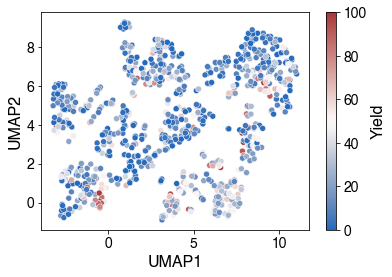

In [18]:
# All good! Visualize the distribution
print("Distribution of yields:")
fig = plt.plot(figsize=(7, 5))
yield_list = df_processed["yield"].to_list()
br_list = [idx.split(".")[0] for idx in df_processed.index]
df_data = df_processed.drop(columns='yield')  # drop the objective values before the umap is generated
df_data = pd.DataFrame(scale(df_data),df_data.index,df_data.columns)
fit = umap.UMAP(n_neighbors=30,min_dist=0.6,n_components=2,metric="euclidean",random_state=42)
df_umap = pd.DataFrame(fit.fit_transform(df_data),df_data.index,["UMAP1","UMAP2"])
# map the yield data onto the UMAP
df_umap["yield"] = yield_list
# map the bromides onto the UMAP
df_umap["Bromide"] = br_list
sns.scatterplot(data=df_umap, x="UMAP1", y="UMAP2",hue="yield", palette="vlag",legend=False)

# Add a colorbar for the 'hue' (selected/ removed points)
norm = mpl.colors.Normalize(vmin=0, vmax=100)  # Normalize the colorscale
sm = plt.cm.ScalarMappable(cmap="vlag", norm=norm)
sm.set_array([])  # Empty array for ScalarMappable
cbar = plt.colorbar(sm)
cbar.set_label('Yield')  # Label for the colorbar


Visualization by bromides:


<AxesSubplot:xlabel='UMAP1', ylabel='UMAP2'>

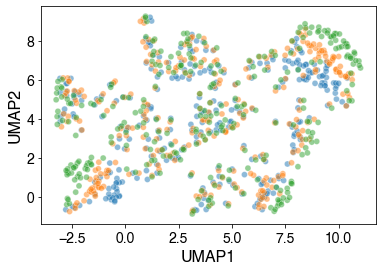

In [19]:
# All good! Visualize the bromides
print("Visualization by bromides:")
fig = plt.plot(figsize=(7, 5))
sns.scatterplot(data=df_umap, x="UMAP1", y="UMAP2",hue="Bromide",legend=False,alpha=0.5)

The bromides have similar distributions which suggests that the UMAP location is mainly driven by the features of the acid as there are many more acid features than bromide features.

In [20]:
# Clean up unnessary files
current_dir = os.getcwd()
for filename in os.listdir(current_dir):
    if "processed" in filename or filename.startswith("xec_fully_combinatorial"):
        file_path = os.path.join(current_dir, filename)
        os.remove(file_path)
        print(f"Deleted: {filename}")

Deleted: xec_processed_descr_dft_subs.csv
Deleted: xec_unprocessed_descr_dft_subs.csv
Deleted: xec_fully_combinatorial_reaction_space.csv
